### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading Data Set

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.shape

(119390, 36)

### the above dataframe has 119390 rows and 36 colums

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

### Converting datatype of Reservation Status column from string to datetime

In [4]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'].info

<bound method Series.info of 0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]>

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


### Find missing Data or Null Values

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Column <span style="color:red">__Countries,Agent and Company__ </span> have missing data of <span style="color:red">__488, 16340 and 112593__</span> respectively

In [8]:
## NOTE-> droping Company and Agent Columns from the data set
if set(['company','agent']).issubset(df.columns):
    df.drop(['company','agent'], axis=1,inplace=True )

In [9]:

df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))
print ('total columns :{}'.format(len(numeric_features) + len(categorical_features)))

We have 19 numerical features : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date']

We have 15 categorical features : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'name', 'email', 'phone-number', 'credit_card']
total columns :34


### Number of unique data in columns

In [12]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-"*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'I

### Find outliers

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


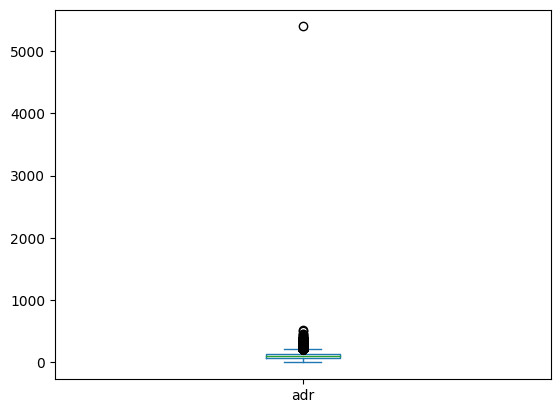

In [14]:
df["adr"].plot(kind="box")
plt.show()

In [15]:
df=df[df["adr"]<5000]

<AxesSubplot: >

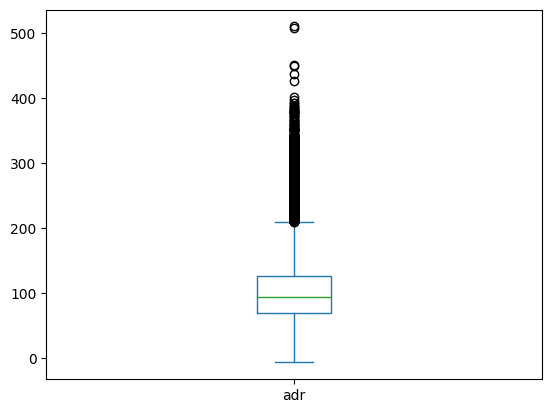

In [16]:
df["adr"].plot(kind="box")

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


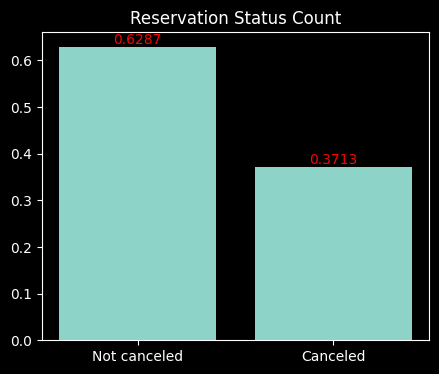

In [17]:
cancelled_percentage= df["is_canceled"].value_counts(normalize=True)
print(cancelled_percentage)
plt.style.use("dark_background")
plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
ax=plt.subplot()
plt.bar(["Not canceled","Canceled"],df["is_canceled"].value_counts(normalize=True))
ax.bar_label(ax.containers[0],color="red",fontsize=10,fmt='%.4f')
plt.show()

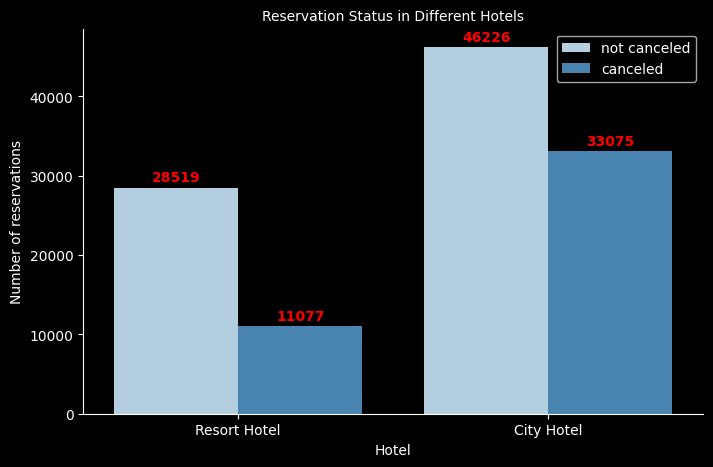

In [18]:
plt.figure(figsize=(8,5))
ax1=sns.countplot(x="hotel",hue="is_canceled",data=df,palette="Blues")
#sns.despine(left=True, bottom=True)
sns.despine(top=True, right=True)
#sns.set_style({'axes.facecolor':'black', 'grid.color': '.8', 'font.family':'Times New Roman'})
ax1.legend(["not canceled","canceled"])
#labeling the bars
for container in ax1.containers:
    ax1.bar_label(container,color="red",fontsize=10,weight="bold",padding=2)
plt.title("Reservation Status in Different Hotels",size=10)
plt.xlabel("Hotel")
plt.ylabel("Number of reservations")
plt.show()

In [19]:
resort_hotels=df[df["hotel"]=="Resort Hotel"]
resort_hotels["is_canceled"].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [20]:
city_hotels=df[df["hotel"]=="City Hotel"]
city_hotels["is_canceled"].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [21]:
resort_hotel_group=resort_hotels.groupby("reservation_status_date")[["adr"]].mean() 
city_hotel_group=city_hotels.groupby("reservation_status_date")[["adr"]].mean() 

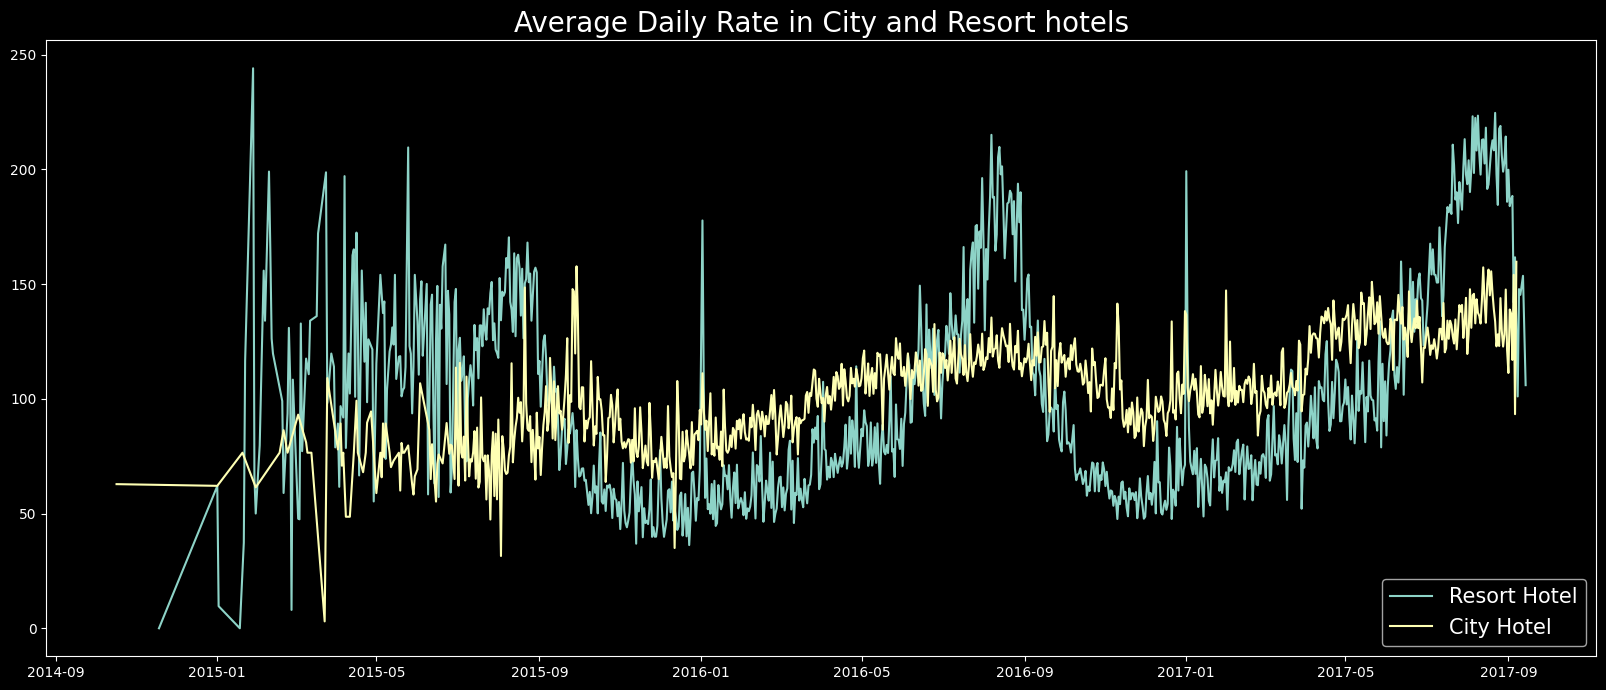

In [22]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City and Resort hotels",fontsize=20)
plt.plot(resort_hotel_group.index,resort_hotel_group["adr"],label="Resort Hotel")
plt.plot(city_hotel_group.index,city_hotel_group["adr"],label="City Hotel")
plt.legend(fontsize=15)
plt.show()

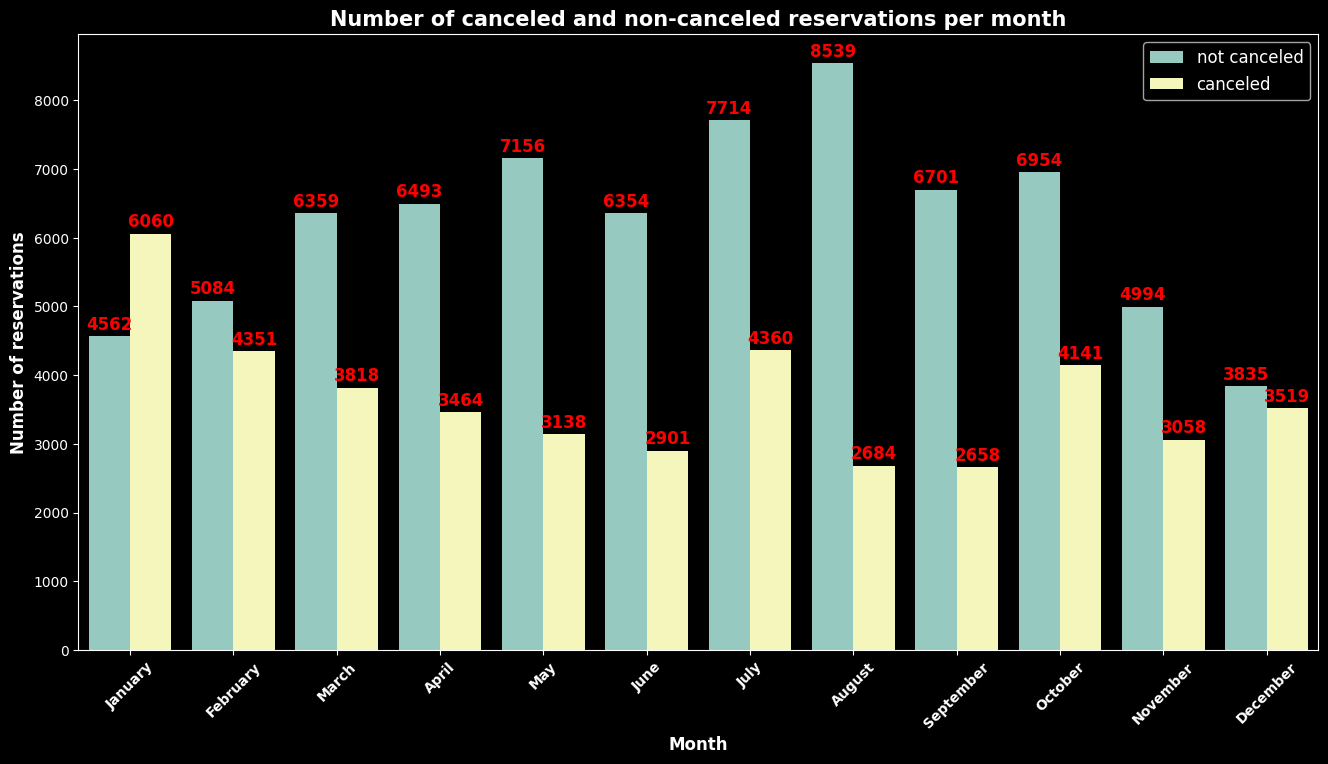

In [23]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
ax2=sns.countplot(x="month",hue="is_canceled",data=df)
for container in ax2.containers:
    ax2.bar_label(container,color="red",fontsize=12,weight="bold",padding=2)
plt.title("Number of canceled and non-canceled reservations per month",fontsize=15,weight="bold")
plt.xlabel("Month",fontsize=12,weight="bold")
plt.ylabel("Number of reservations",fontsize=12,weight="bold")
plt.legend(["not canceled","canceled"],loc="best",fontsize=12)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],labels=["January","February","March","April","May","June","July","August","September","October","November","December"],rotation=45,color="white",fontsize=10,weight="bold")

plt.show()

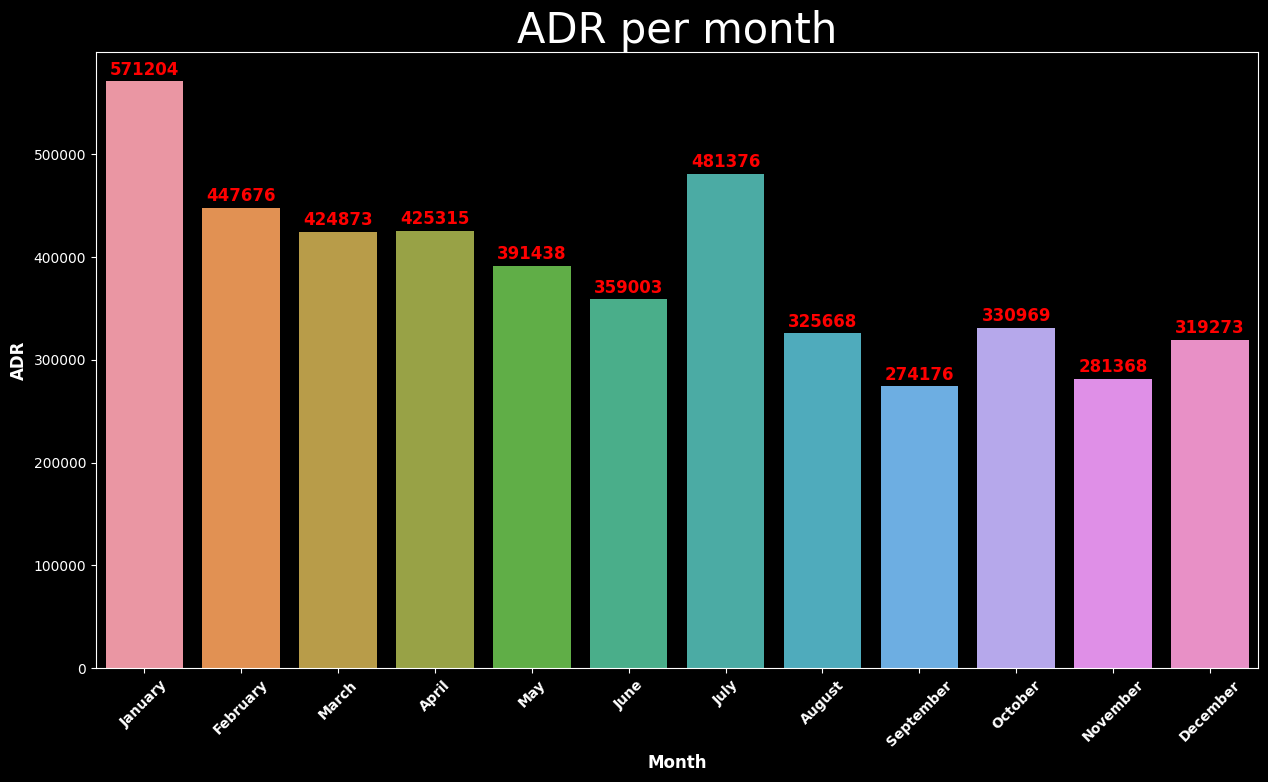

In [24]:
plt.figure(figsize=(15,8))
plt.title("ADR per month",fontsize=30)
ax3=sns.barplot(x="month",y="adr",data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index())
for container in ax3.containers:
    ax3.bar_label(container,color="red",fontsize=12,weight="bold",padding=2)

plt.xlabel("Month",fontsize=12,weight="bold")
plt.ylabel("ADR",fontsize=12,weight="bold")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],labels=["January","February","March","April","May","June","July","August","September","October","November","December"],rotation=45,color="white",fontsize=10,weight="bold")
plt.show()

### September is ADR is the Lowest

### Top 10 Country's with the highest Cancelation

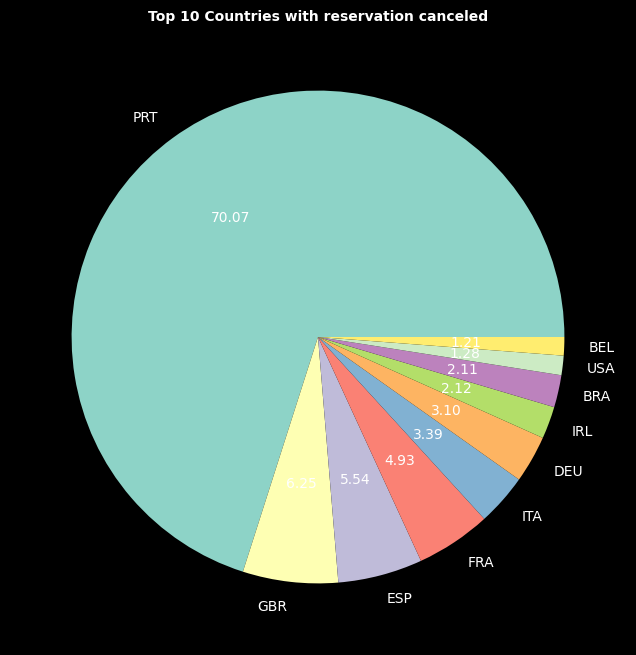

In [25]:
cancelled_data=df[df["is_canceled"]==1]
top_10_country=cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 Countries with reservation canceled",weight="bold",fontsize=10)
plt.pie(top_10_country,autopct="%.2f",labels=top_10_country.index)
plt.show()

In [29]:
df["market_segment"].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

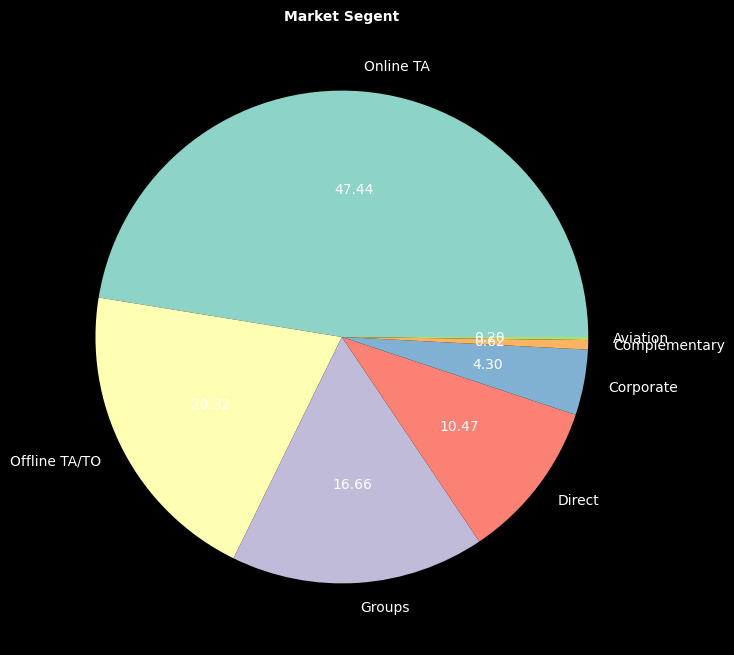

In [33]:
market_segment_normalize=df["market_segment"].value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.title("Market Segent",weight="bold",fontsize=10)
plt.pie(market_segment_normalize,autopct="%.2f",labels=market_segment_normalize.index)
plt.show()

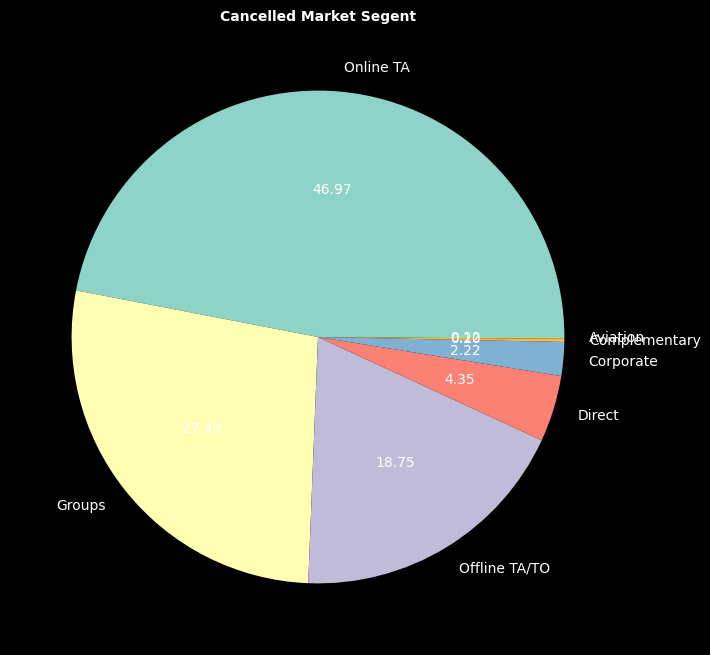

In [35]:
cancelled_market_segment=cancelled_data["market_segment"].value_counts()
plt.figure(figsize=(8,8))
plt.title("Cancelled Market Segent",weight="bold",fontsize=10)
plt.pie(cancelled_market_segment,autopct="%.2f",labels=cancelled_market_segment.index)
plt.show()

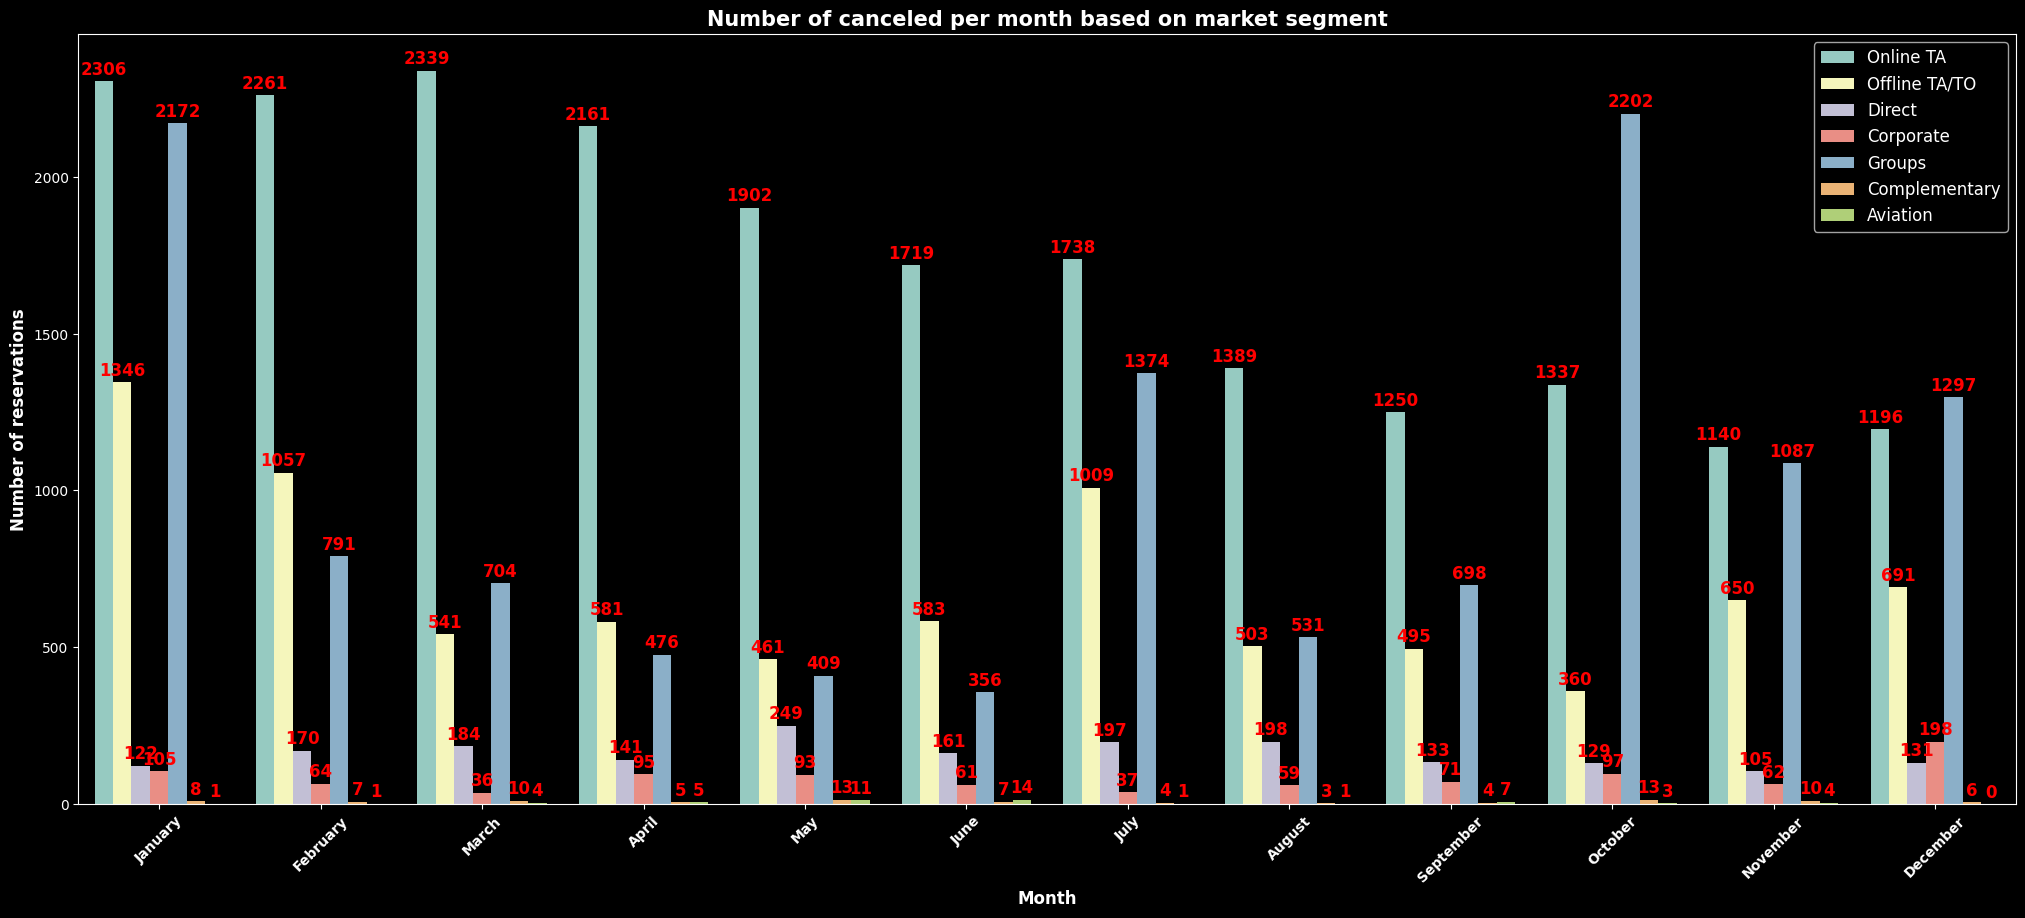

In [51]:
plt.figure(figsize=(25,10))

ax2=sns.countplot(x="month",hue="market_segment",data=cancelled_data)
for container in ax2.containers:
    ax2.bar_label(container,color="red",fontsize=12,weight="bold",padding=2)
plt.title("Number of canceled per month based on market segment",fontsize=15,weight="bold")
plt.xlabel("Month",fontsize=12,weight="bold")
plt.ylabel("Number of reservations",fontsize=12,weight="bold")
plt.legend(fontsize=12)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],labels=["January","February","March","April","May","June","July","August","September","October","November","December"],rotation=45,color="white",fontsize=10,weight="bold",ha="center")

plt.show()

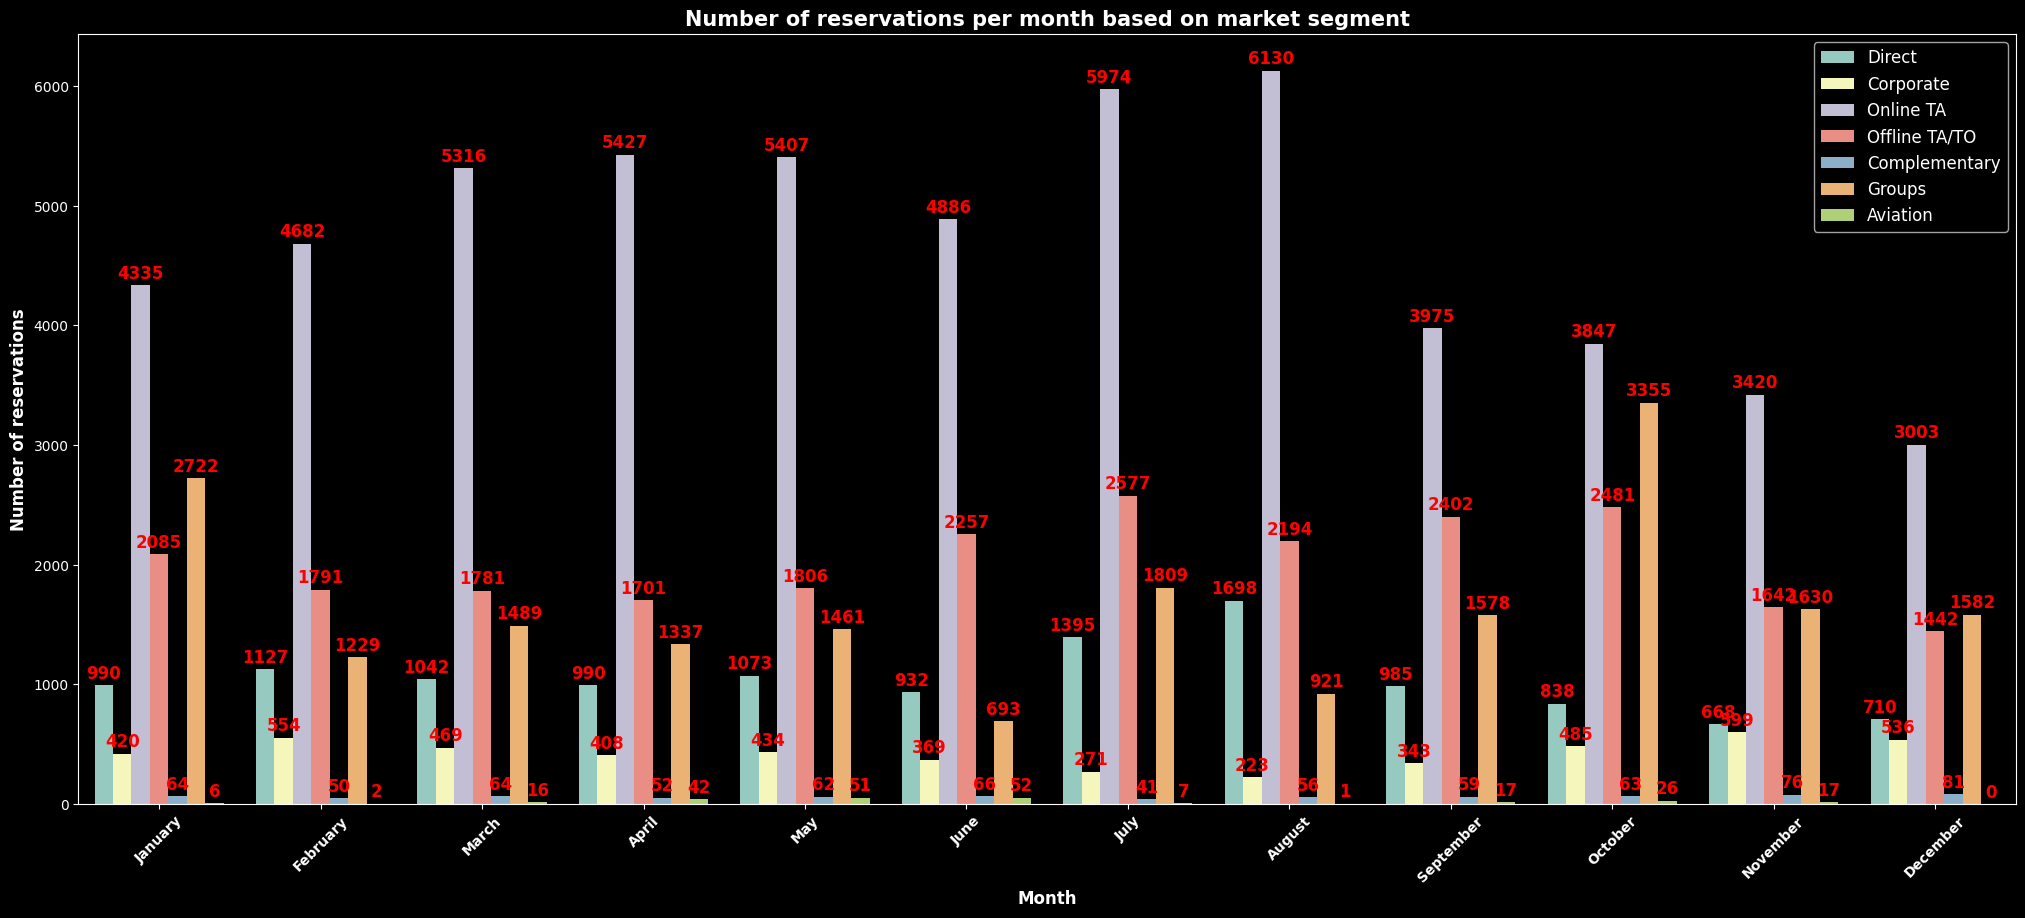

In [50]:
plt.figure(figsize=(25,10))

ax2=sns.countplot(x="month",hue="market_segment",data=df)
for container in ax2.containers:
    ax2.bar_label(container,color="red",fontsize=12,weight="bold",padding=2)
plt.title("Number of reservations per month based on market segment",fontsize=15,weight="bold")
plt.xlabel("Month",fontsize=12,weight="bold")
plt.ylabel("Number of reservations",fontsize=12,weight="bold")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],labels=["January","February","March","April","May","June","July","August","September","October","November","December"],rotation=45,color="white",fontsize=10,weight="bold",ha="center")
plt.legend(fontsize=12)
plt.show()